In [1]:
import numpy as np
import pandas as pd
import imblearn
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff

In [2]:
minority_p = 0.1
weights=(minority_p, 1-minority_p)
n_classes=2
class_sep=0.8
n_clusters=1

dataset = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=list(weights),
    class_sep=0.8,
    random_state=42,
)

In [52]:
c0 = dataset[0][dataset[1] == 0, :]
c1 = dataset[0][dataset[1] == 1, :]
nn = NearestNeighbors(n_neighbors=3, n_jobs=-1)
nn.fit(c0)

nns_ = nn.kneighbors(c0, return_distance=False)


In [41]:
nns_.sort(axis=1)
nns_ = np.unique(nns_, axis=0)

In [42]:
def point_on_triangle(xs, ys, modifier=0.0):
    """
    Random point on the triangle given by xs and ys.
    """
    s, t = sorted([random.random() * (1 - modifier), random.random() * (1 - modifier)])
    s += modifier
    t += modifier
    return (s * xs[0] + (t-s)*xs[1] + (1-t)*xs[2],
            s * ys[0] + (t-s)*ys[1] + (1-t)*ys[2])

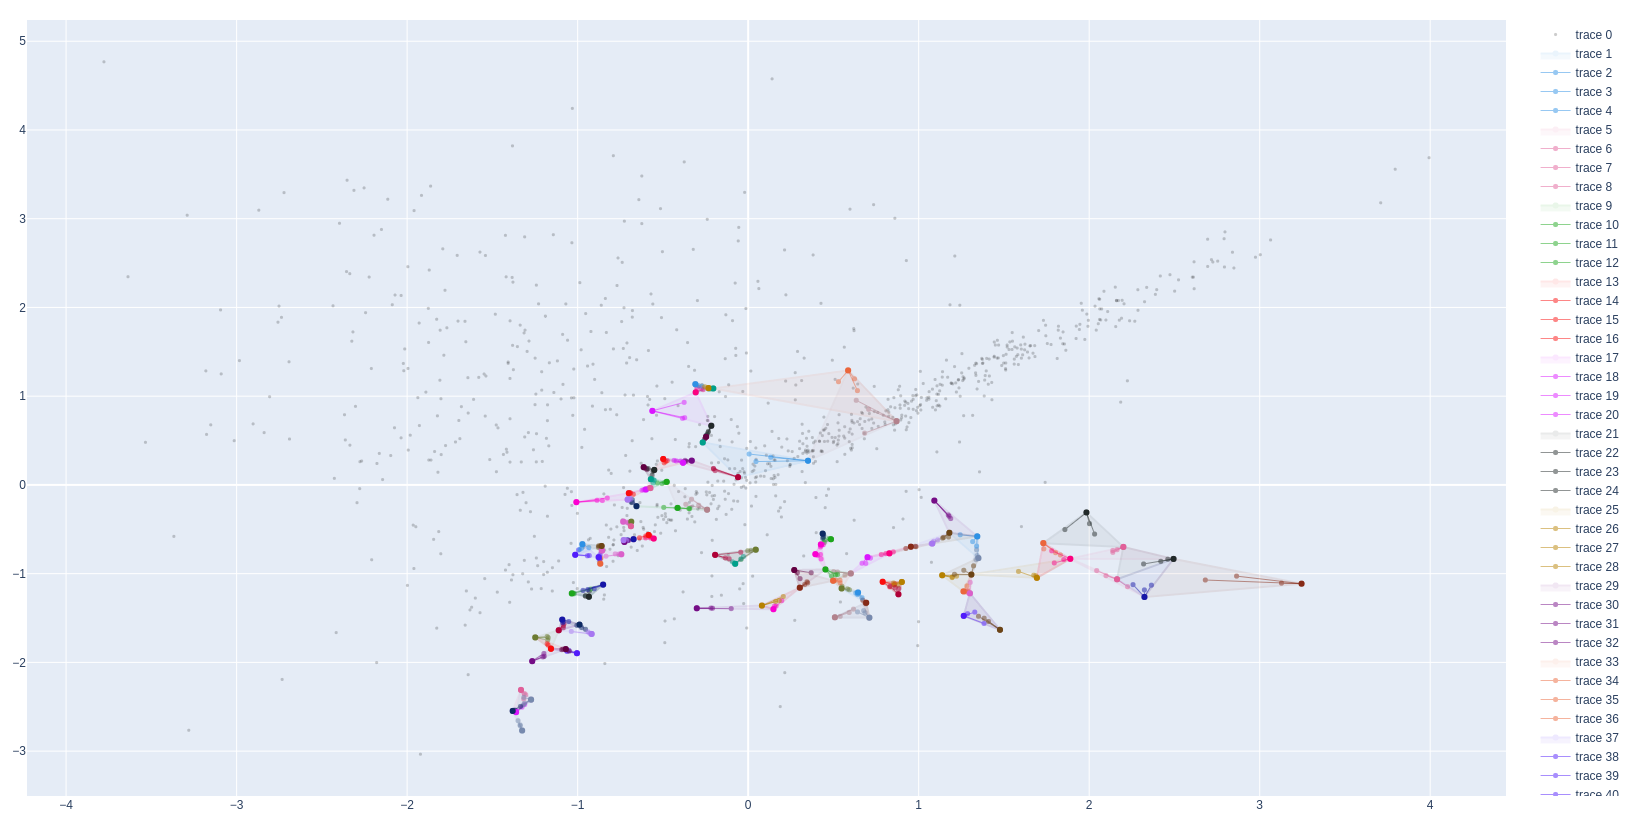

In [59]:
fig = go.Figure(
    go.Scatter(
        x=c1[:, 0], y=c1[:, 1], mode="markers", marker=dict(color="black", opacity=0.2, size=3)
    )
)
colors = px.colors.qualitative.Dark24
j = 0
n_points = 3
for i, points in enumerate(nns_):
    if j > len(colors) -1:
        j = 0
    c0_xs = [c0[points[0]][0], c0[points[1]][0], c0[points[2]][0], c0[points[0]][0]]
    c0_ys = [c0[points[0]][1], c0[points[1]][1], c0[points[2]][1], c0[points[0]][1]]

    fig.add_trace(go.Scatter(x=c0_xs, y=c0_ys, fill="toself", opacity=0.1, marker=dict(color=colors[j])))
    modifier = 0.3
    for k in range(n_points):
#         modifier /= (1 + 1/n_points)
        if modifier <= 0: modifier = 0
        rnd_point = point_on_triangle(c0_xs, c0_ys, modifier)
        fig.add_trace(
            go.Scatter(
                x=[c0_xs[0], rnd_point[0]],
                y=[c0_ys[0], rnd_point[1]],
                mode="lines+markers",
#                 mode="markers",
                opacity=0.5,
                marker=dict(color=colors[j], opacity=1, size=5),
                line=dict(width=1)
            )
        )
    j += 1

j = 0
for p in c0:
    if j > len(colors) -1:
        j = 0
    fig.add_trace(
        go.Scatter(x=[p[0]], y=[p[1]], mode="markers", marker=dict(color=colors[j]))
    )
    j += 1
fig.update_layout(width=800, height=800, margin=dict(l=20, r=20, t=20, b=20),)
fig.show()

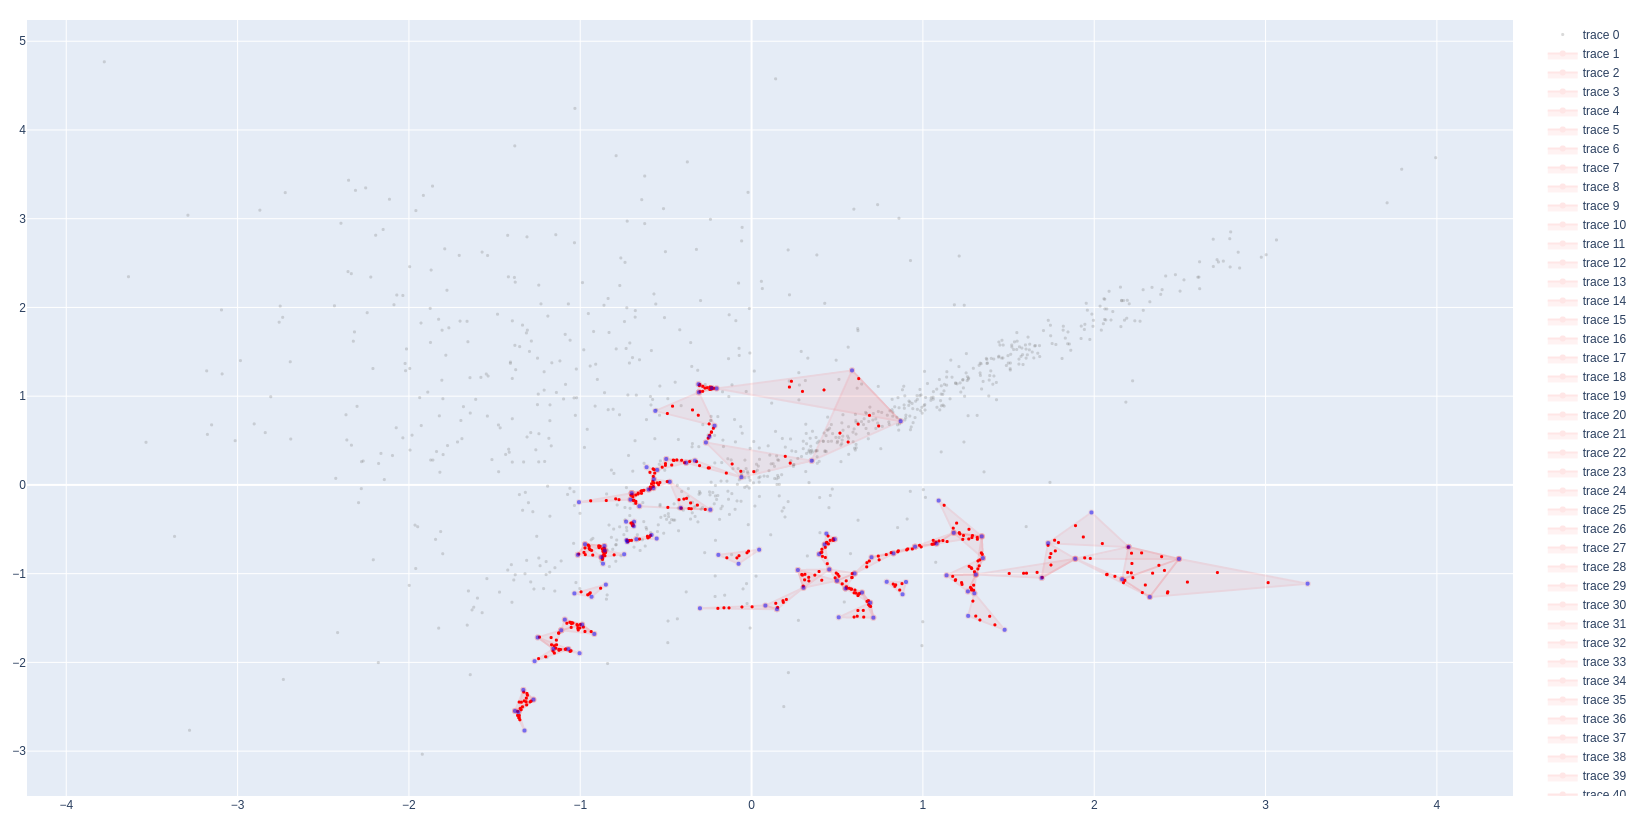

In [50]:
fig = go.Figure(
    go.Scatter(
        x=c1[:, 0], y=c1[:, 1], mode="markers", marker=dict(color="grey", opacity=0.3, size=3)
    )
)

colors = px.colors.qualitative.Alphabet
j = 0
n_points = 5
rnd_points = []
for i, points in enumerate(nns_):
    if j > 25:
        j = 0
    c0_xs = [c0[points[0]][0], c0[points[1]][0], c0[points[2]][0], c0[points[0]][0]]
    c0_ys = [c0[points[0]][1], c0[points[1]][1], c0[points[2]][1], c0[points[0]][1]]

    fig.add_trace(go.Scatter(x=c0_xs, y=c0_ys, fill="toself", opacity=0.1, marker=dict(color="red")))
    modifier = 0.5
    for k in range(n_points):
        modifier /= 1.05
        if modifier <= 0:
            modifier = 0
        rnd_points.append(point_on_triangle(c0_xs, c0_ys, modifier))
    j += 1
rnd_points = np.array(rnd_points)
fig.add_trace(
    go.Scatter(
        x=rnd_points[:, 0],
        y=rnd_points[:, 1],
#         mode="lines+markers",
        mode="markers",
        opacity=1.0,
        marker=dict(color="red", opacity=1, size=3),
    )
)
fig.add_trace(
    go.Scatter(
        x=c0[:, 0], y=c0[:, 1], mode="markers", marker=dict(color="blue", opacity=0.5, size=4)
    )
)

fig.update_layout(
    width=800, height=800, margin=dict(l=20, r=20, t=20, b=20),
)
fig.show()